In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Understanding Business Question:
#### RFM Clustering for an Online Retail company

In [2]:
data = pd.read_csv('../input/online-retail-customer-clustering/OnlineRetail.csv', delimiter=',', encoding = "ISO-8859-1")

## Data Inspection

In [3]:
data.shape

(541909, 8)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.shape

(406829, 8)

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#change the format of InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
# delet the hour and creat the new column Date instead of InvoiceDate
data['Date']=data['InvoiceDate'].dt.date
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12


In [15]:
data['Date']

0         2010-01-12
1         2010-01-12
2         2010-01-12
3         2010-01-12
4         2010-01-12
             ...    
541904    2011-09-12
541905    2011-09-12
541906    2011-09-12
541907    2011-09-12
541908    2011-09-12
Name: Date, Length: 406829, dtype: object

(array([14610., 14700., 14791., 14883., 14975., 15065., 15156., 15248.,
        15340.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

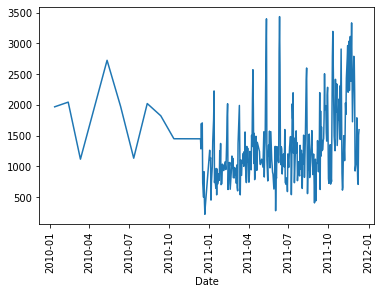

In [16]:
#daily demand
daily_demand = data.groupby(by = ['Date'])['InvoiceNo'].count()
daily_demand.plot()
plt.xticks(rotation = 90) 

## Creating 'Amount' column to see total transaction amount

In [17]:
data['Amount'] = data['UnitPrice'] * data['Quantity'] 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34


## Create RFM Dataset

###  Monetary data (total of all the transactions of a customer)
How much money did the customer spend?Monetary is defined as the amount of money spent by the customer during a certain period. 


In [18]:
data1=pd.DataFrame({'monetary': data.groupby(by = ['CustomerID'])['Amount'].sum()})
data1.head()

,monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


Text(0, 0.5, 'Frequency')

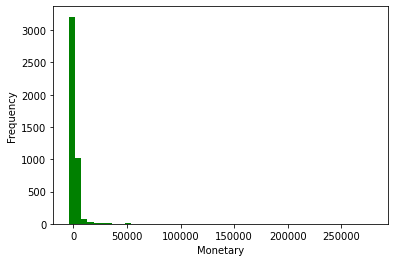

In [19]:
#Histogram of monetary
plt.hist(data1['monetary'], color = 'green', 
         bins = np.linspace(data1['monetary'].min(), data1['monetary'].max(), 50))
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [20]:
data1.describe()

,monetary
count,4372.000000
mean,1898.459701
std,8219.345141
min,-4287.630000
25%,293.362500
50%,648.075000
75%,1611.725000
max,279489.020000


### Frequency:
How many times did the customer purchase? Frequency is defined as the number of purchases a customer makes in a specific period.

In [21]:
data2 = pd.DataFrame({'freq': data.groupby(by = ['CustomerID'])['InvoiceNo'].count()})
data2.head()

,freq
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17


Text(0, 0.5, 'Frequency')

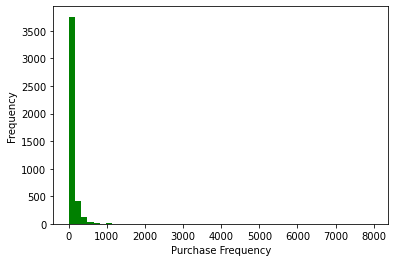

In [22]:
#Histogram of  frequency
plt.hist(data2['freq'], color = 'green', 
         bins = np.linspace(data2['freq'].min(), data2['freq'].max(), 50))
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')

In [23]:
data['Date'].max()

datetime.date(2011, 12, 10)

### Recency:
 When was the last time the customer made a purchase?Recency value is the number of days a customer takes between two purchases. 

In [24]:
Last_transact = pd.to_datetime(data['Date'].max()).date() - data['Date']
Last_transact

0        697 days
1        697 days
2        697 days
3        697 days
4        697 days
           ...   
541904    89 days
541905    89 days
541906    89 days
541907    89 days
541908    89 days
Name: Date, Length: 406829, dtype: timedelta64[ns]

In [25]:
Last_transact.dt.days

0         697
1         697
2         697
3         697
4         697
         ... 
541904     89
541905     89
541906     89
541907     89
541908     89
Name: Date, Length: 406829, dtype: int64

In [26]:
data['Last_transact'] = Last_transact.dt.days
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Amount,Last_transact
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34,697


In [27]:
data3 = pd.DataFrame({'recency': data.groupby(by = ['CustomerID'])['Last_transact'].min()})
data3

,recency
CustomerID,
12346.0,326
12347.0,40
12348.0,76
12349.0,19
12350.0,311
...,...
18280.0,160
18281.0,4
18282.0,93


Text(0, 0.5, 'Frequency')

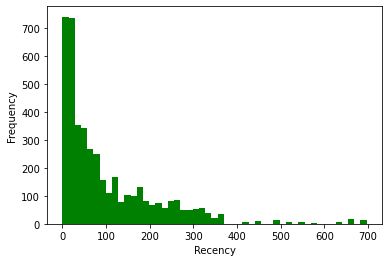

In [28]:
#Histogram of recency
plt.hist(data3['recency'], color = 'green', 
         bins = np.linspace(data3['recency'].min(), data3['recency'].max(), 50))
plt.xlabel('Recency')
plt.ylabel('Frequency')

### RFM Dataframe for Customers

In [29]:
df = data1.merge(data2, left_index = True, right_index = True)
df

,monetary,freq
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [30]:
rfm_customer = df.merge(data3, left_index = True, right_index = True)
rfm_customer

,monetary,freq,recency
CustomerID,,,
12346.0,0.00,2,326
12347.0,4310.00,182,40
12348.0,1797.24,31,76
12349.0,1757.55,73,19
12350.0,334.40,17,311
...,...,...,...
18280.0,180.60,10,160
18281.0,80.82,7,4
18282.0,176.60,13,93


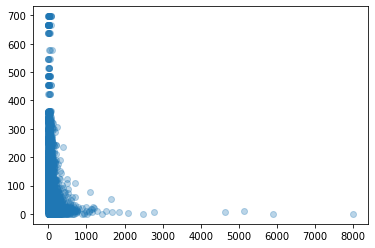

In [31]:
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], alpha = 0.3)

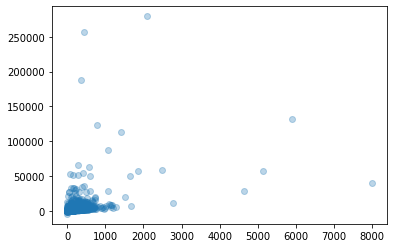

In [32]:
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['monetary'], alpha = 0.3)

In [33]:
rfm_customer[['freq', 'monetary']].corr(method = 'pearson')

,freq,monetary
freq,1.000000,0.446622
monetary,0.446622,1.000000


In [34]:
#Scale features
from sklearn.preprocessing import StandardScaler

In [35]:
scaled_data = StandardScaler().fit_transform(rfm_customer)
scaled_data

array([[-0.23100099, -0.3917197 ,  1.97520461],
       [ 0.29343167,  0.38265697, -0.53535955],
       [-0.01231622, -0.26695902, -0.21934448],
       ...,
       [-0.20951263, -0.34439668, -0.07011514],
       [ 0.02390005,  2.85205812, -0.79870544],
       [-0.00744423, -0.0991774 , -0.8864874 ]])

In [36]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns = rfm_customer.columns, 
                           index = rfm_customer.index)

scaled_data

,monetary,freq,recency
CustomerID,,,
12346.0,-0.231001,-0.391720,1.975205
12347.0,0.293432,0.382657,-0.535360
12348.0,-0.012316,-0.266959,-0.219344
12349.0,-0.017146,-0.086271,-0.719702
12350.0,-0.190312,-0.327188,1.843532
...,...,...,...
18280.0,-0.209026,-0.357303,0.518024
18281.0,-0.221167,-0.370209,-0.851375
18282.0,-0.209513,-0.344397,-0.070115


## Clustering

### K-means ++ 

#n_init: sets the number of initializations to perform. 

#The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

In [37]:

from sklearn.cluster import KMeans
seg_km1 = KMeans(n_clusters = 7, init = 'k-means++', random_state = 1000, n_init = 15).fit(scaled_data)

In [38]:
rfm_customer['seg_km1'] = seg_km1.predict(scaled_data)
rfm_customer

,monetary,freq,recency,seg_km1
CustomerID,,,,
12346.0,0.00,2,326,1
12347.0,4310.00,182,40,0
12348.0,1797.24,31,76,0
12349.0,1757.55,73,19,0
12350.0,334.40,17,311,1
...,...,...,...,...
18280.0,180.60,10,160,1
18281.0,80.82,7,4,0
18282.0,176.60,13,93,0


In [39]:
#Results
rfm_customer.groupby(['seg_km1'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km1,,,
0,68.043371,46.669252,1248.371070
1,31.548329,230.555556,472.417561
2,5914.000000,4.250000,64776.602500
3,956.333333,5.666667,241136.560000
4,424.338415,20.737805,7178.989024
5,894.461538,16.769231,67819.939231
6,19.728395,578.814815,220.191605


Text(0, 0.5, 'recency')

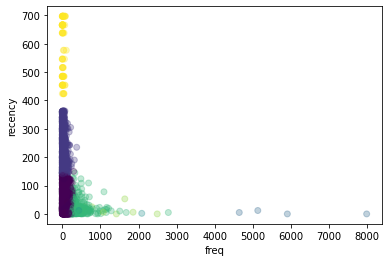

In [40]:
#Scatter Plot 
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km1'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')

In [41]:
rfm_customer['seg_km1'].value_counts()

0    2836
1    1107
4     328
6      81
5      13
2       4
3       3
Name: seg_km1, dtype: int64

## Optimal Number of Clusters:

### a: The Elbow Method 

In [42]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

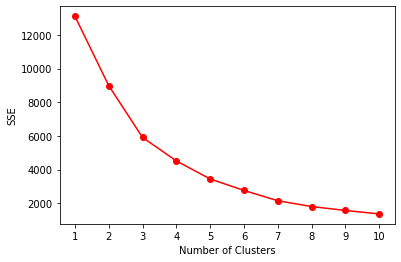

In [43]:
plt.plot(range(1, 11), sse, 'ro-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

It seems that k=3 or k=4 is the optimal number of clusters.
But we will do silhouette analysis and see if elbow method and silhouette give same optimal values for k or not.

### b: Silhouette Coefficient

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

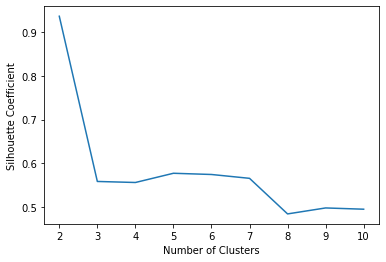

In [46]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [47]:
# k means using 3 clusters and k-means++ initialization
#Second Try
from sklearn.cluster import KMeans
seg_km2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1234, n_init = 10).fit(scaled_data)

In [48]:
rfm_customer['seg_pred']=seg_km2.predict(scaled_data)
rfm_customer

,monetary,freq,recency,seg_km1,seg_pred
CustomerID,,,,,
12346.0,0.00,2,326,1,1
12347.0,4310.00,182,40,0,0
12348.0,1797.24,31,76,0,0
12349.0,1757.55,73,19,0,0
12350.0,334.40,17,311,1,1
...,...,...,...,...,...
18280.0,180.60,10,160,1,1
18281.0,80.82,7,4,0,0
18282.0,176.60,13,93,0,0


In [49]:
rfm_customer['seg_pred'].value_counts()

0    3266
1    1094
2      12
Name: seg_pred, dtype: int64

<AxesSubplot:xlabel='seg_pred', ylabel='monetary'>

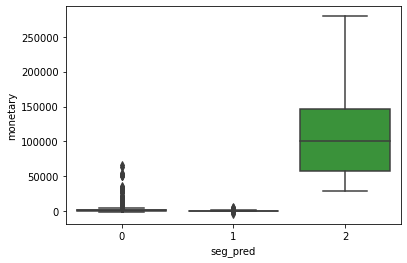

In [50]:
# plot
sns.boxplot(x=rfm_customer['seg_pred'], y=rfm_customer['monetary'], data=rfm_customer)

<AxesSubplot:xlabel='seg_pred', ylabel='recency'>

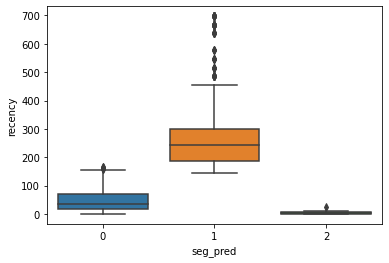

In [51]:
# plot
sns.boxplot(x=rfm_customer['seg_pred'], y=rfm_customer['recency'], data=rfm_customer)

<AxesSubplot:xlabel='seg_pred', ylabel='freq'>

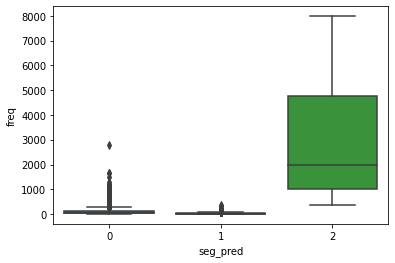

In [52]:
# plot
sns.boxplot(x=rfm_customer['seg_pred'], y=rfm_customer['freq'], data=rfm_customer)

### we analyze people in the category 0,1, 2

In [53]:
print(rfm_customer[rfm_customer['seg_pred']==1],'\n\n\n\n')
print(rfm_customer[rfm_customer['seg_pred']==1].describe(),"\n\n")

print('Percentage of these customers',((rfm_customer[rfm_customer['seg_pred']==1].shape[0])/rfm_customer.shape[0])*100)

            monetary  freq  recency  seg_km1  seg_pred
CustomerID                                            
12346.0         0.00     2      326        1         1
12350.0       334.40    17      311        1         1
12353.0        89.00     4      205        1         1
12354.0      1079.40    58      233        1         1
12357.0      6207.67   131      182        1         1
...              ...   ...      ...      ...       ...
18256.0       -50.10     4      355        1         1
18269.0       138.90     8      359        1         1
18270.0       238.95    13      241        1         1
18273.0       204.00     3      151        1         1
18280.0       180.60    10      160        1         1

[1094 rows x 5 columns] 




          monetary         freq      recency      seg_km1  seg_pred
count  1094.000000  1094.000000  1094.000000  1094.000000    1094.0
mean    424.147294    29.170932   263.576782     1.370201       1.0
std     544.443024    34.853123   109.363764     1.

In [54]:
print(rfm_customer[rfm_customer['seg_pred']==0],'\n\n\n\n')
print(rfm_customer[rfm_customer['seg_pred']==0].describe(),"\n\n")

print('Percentage of these customers',((rfm_customer[rfm_customer['seg_pred']==0].shape[0])/rfm_customer.shape[0])*100)

            monetary  freq  recency  seg_km1  seg_pred
CustomerID                                            
12347.0      4310.00   182       40        0         0
12348.0      1797.24    31       76        0         0
12349.0      1757.55    73       19        0         0
12352.0      1545.41    95       73        0         0
12355.0       459.40    13       96        0         0
...              ...   ...      ...      ...       ...
18278.0       173.90     9       74        0         0
18281.0        80.82     7        4        0         0
18282.0       176.60    13       93        0         0
18283.0      2094.88   756       10        4         0
18287.0      1837.28    70        0        0         0

[3266 rows x 5 columns] 




           monetary         freq     recency      seg_km1  seg_pred
count   3266.000000  3266.000000  3266.00000  3266.000000    3266.0
mean    1963.102386   104.338334    46.87477     0.442743       0.0
std     4023.494530   148.247423    39.41358     1.

In [55]:
print(rfm_customer[rfm_customer['seg_pred']==2],'\n\n\n\n')
print(rfm_customer[rfm_customer['seg_pred']==2].describe(),"\n\n")

print('Percentage of these customers',((rfm_customer[rfm_customer['seg_pred']==2].shape[0])/rfm_customer.shape[0])*100)

             monetary  freq  recency  seg_km1  seg_pred
CustomerID                                             
12415.0     123725.45   778       25        5         2
12748.0      29072.10  4642        5        2         2
13089.0      57385.88  1857        6        5         2
14096.0      57120.91  5128       12        2         2
14156.0     113384.14  1420        0        5         2
14646.0     279489.02  2085        2        3         2
14911.0     132572.62  5903        0        2         2
15311.0      59419.34  2491        0        5         2
17450.0     187482.17   351        3        3         2
17511.0      88125.38  1076        6        5         2
17841.0      40340.78  7983        0        2         2
18102.0     256438.49   433       12        3         2 




            monetary         freq    recency    seg_km1  seg_pred
count      12.000000    12.000000  12.000000  12.000000      12.0
mean   118713.023333  2845.583333   5.916667   3.500000       2.0
std     83107